<a href="https://colab.research.google.com/github/gabrfern99/lia1_2024_1/blob/main/Entregas%20-%20Gabriel%20Fernando/Ci%C3%AAncia_de_Dados_Policia_Federal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Conjunto de Dados da Polícia Federal para Ciência de Dados

O conjunto de dados fornecido pela Polícia Federal oferece uma rica fonte de informações para análise na área de ciência de dados. Este conjunto de dados contém registros de operações policiais realizadas em todo o país, abrangendo uma variedade de áreas, desde crimes financeiros e corrupção até tráfico de drogas e crimes ambientais.

Cada entrada no conjunto de dados representa uma operação específica, e inclui uma variedade de informações relevantes, como a data de início e deflagração da operação, o tipo de operação, a área específica de atuação (por exemplo, crimes fazendários, tráfico de drogas), as unidades federativas envolvidas, e diversas métricas relacionadas às prisões, apreensões, prejuízos causados e outros aspectos relevantes das operações.

Ao explorar este conjunto de dados, os cientistas de dados têm a oportunidade de realizar uma ampla gama de análises, desde a identificação de padrões e tendências em relação aos tipos de crimes mais frequentes em diferentes regiões até a avaliação do impacto das operações policiais na redução da criminalidade e prejuízos à sociedade. Com as ferramentas certas e uma compreensão profunda dos dados, este conjunto de dados oferece uma valiosa oportunidade para insights significativos e aprimoramento das estratégias de aplicação da lei.


## Importando bibliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [130]:
file_path = "/content/PALAS_OPERACOES_2023_12.csv"
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='latin-1')
    print("CSV file loaded successfully.")
    print(df.head())
except Exception as e:
    print("Error reading CSV file:", e)

CSV file loaded successfully.
               Checksum Id Operacao Data do Inicio Data da Deflagracao  \
0  ef13fd2e65b1e420cf22a3bea3da3a26     31/12/2023          31/12/2023   
1  253b6d8b0a660276b04dd9694e50b123     31/12/2023          31/12/2023   
2  86b474a966e0cc8faf1092967eaf82f4     15/09/2023          30/12/2023   
3  82b1642f9216beae52eaa1ca8e0e6330     21/09/2023          30/12/2023   
4  97a0b256b73505382d3bbd1eac096563     06/10/2023          30/12/2023   

    Tipo de Operacao                                               Area  \
0  Operacao Simples   Crimes Fazendários                            ...   
1  Operacao Simples   Tráfico de Drogas                             ...   
2  Operacao Simples   Crimes Fazendários                            ...   
3  Operacao Simples   Crimes Fazendários                            ...   
4  Operacao Simples   Crimes Fazendários                            ...   

  Sigla Unidade Federativa                        Sigla Unidade Institucio

In [131]:
df.head()

,Checksum Id Operacao,Data do Inicio,Data da Deflagracao,Tipo de Operacao,Area,Sigla Unidade Federativa,Sigla Unidade Institucional,Atuacao em Territorio Indigena,Atuacao em Territorio de Fronteira,Qtd Prisao em Flagrante,...,Proib Ausentar Comarca,Proib Acesso ou Freq,Comparecimento Juizo,Qtd Fianca,Qtd Internacao Prov,Proib Contato,Mand Jud Caut Assec,Recol Domic Noturno,Susp Ex Func Pub A E,Monit Eletronica
0,ef13fd2e65b1e420cf22a3bea3da3a26,31/12/2023,31/12/2023,Operacao Simples,Crimes Fazendários ...,PE,SR/PF/PE ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,0
1,253b6d8b0a660276b04dd9694e50b123,31/12/2023,31/12/2023,Operacao Simples,Tráfico de Drogas ...,SP,DPF/GRU/SP - AIN ...,Nao,...,1,...,0,0,0,0,0,0,0,0,0,0
2,86b474a966e0cc8faf1092967eaf82f4,15/09/2023,30/12/2023,Operacao Simples,Crimes Fazendários ...,PR,DPF/FIG/PR ...,Nao,Paraguai ...,2,...,0,0,0,0,0,0,0,0,0,0
3,82b1642f9216beae52eaa1ca8e0e6330,21/09/2023,30/12/2023,Operacao Simples,Crimes Fazendários ...,PR,DPF/FIG/PR ...,Nao,Paraguai ...,2,...,0,0,0,0,0,0,0,0,0,0
4,97a0b256b73505382d3bbd1eac096563,06/10/2023,30/12/2023,Operacao Simples,Crimes Fazendários ...,PR,DPF/FIG/PR ...,Nao,Argentina ...,1,...,0,0,0,0,0,0,0,0,0,0


### Preprocessa uma parte do dataset

In [132]:
# Removendo linhas com valores ausentes na coluna 'Qtd Prejuizos Causados a Uniao'
df.dropna(subset=['Qtd Prejuizos Causados a Uniao'], inplace=True)

In [136]:
# Removendo o prefixo 'R$' e substituindo vírgulas por pontos
df['Qtd Prejuizos Causados a Uniao'] = df['Qtd Prejuizos Causados a Uniao'].str.replace('R$', '').str.replace(',', '').str.replace('.', '')

In [137]:
# Remover "..." e espaços em branco adicionais da coluna 'Area'
df['Area'] = df['Area'].str.replace('\.\.\.', '').str.strip()

In [138]:
# Converter a coluna 'Qtd Prejuizos Causados a Uniao' para numérica
df['Qtd Prejuizos Causados a Uniao'] = df['Qtd Prejuizos Causados a Uniao'].astype(int)

## 1.Qual o valor total dos prejuízos causados à União em operações de acordo com diferentes áreas

In [121]:
print(df['Qtd Prejuizos Causados a Uniao'].unique())

[    8983528    15999994      738796    67741642    46424166    38564324
     1200898     1773954     8592574     1077656     9359760     4415750
      691900      600000     4411500     5871787   231086250     2367331
  7000000000      300000      500000   214231350    15000000       42066
      708422    35604686      189432      138456   281812500   115465683
 20000000000     9341750    61625000     1039238     5682855  1000000000
     6644243   845437500     3173549    17298342   187875000    10000000
   704531250   104787088  3168000000    63750000     4696875     4350000
     5000000     6687000  4258100000    10800000     2506252    96492600
      706786      216468      847250    46237290   388025000]


In [122]:
# Filtrar o dataframe para incluir apenas as operações relacionadas a fraudes bancárias
fraudes_bancarias = df[df['Area'] == 'Fraudes Bancárias']

# Verificar os valores correspondentes à coluna "Qtd Prejuizos Causados a Uniao" para fraudes bancárias
valores_fraudes_bancarias = fraudes_bancarias['Qtd Prejuizos Causados a Uniao']

# Imprimir os valores para análise
print(valores_fraudes_bancarias)

288    1039238
Name: Qtd Prejuizos Causados a Uniao, dtype: int64


In [123]:
# Agrupar por área e calcular o total de prejuízos em cada área, classificando de forma decrescente
prejuizos_por_area = df.groupby('Area')['Qtd Prejuizos Causados a Uniao'].sum().sort_values(ascending=False)

# Imprimir os top 5 e a quantidade de valor de dano causado para cada área
for area, valor in prejuizos_por_area.head(5).items():
    print(f"Área: {area}, Valor de Dano Causado: R${valor:,.0f}")

Área: Crimes Fazendários, Valor de Dano Causado: R$28,802,345,661
Área: Crimes de Corrupção, Valor de Dano Causado: R$8,000,000,000
Área: Crimes da Alta Tecnologia, Valor de Dano Causado: R$3,168,000,000
Área: Crimes Contra o Patrimônio, Valor de Dano Causado: R$17,298,342
Área: Fraudes Bancárias, Valor de Dano Causado: R$1,039,238


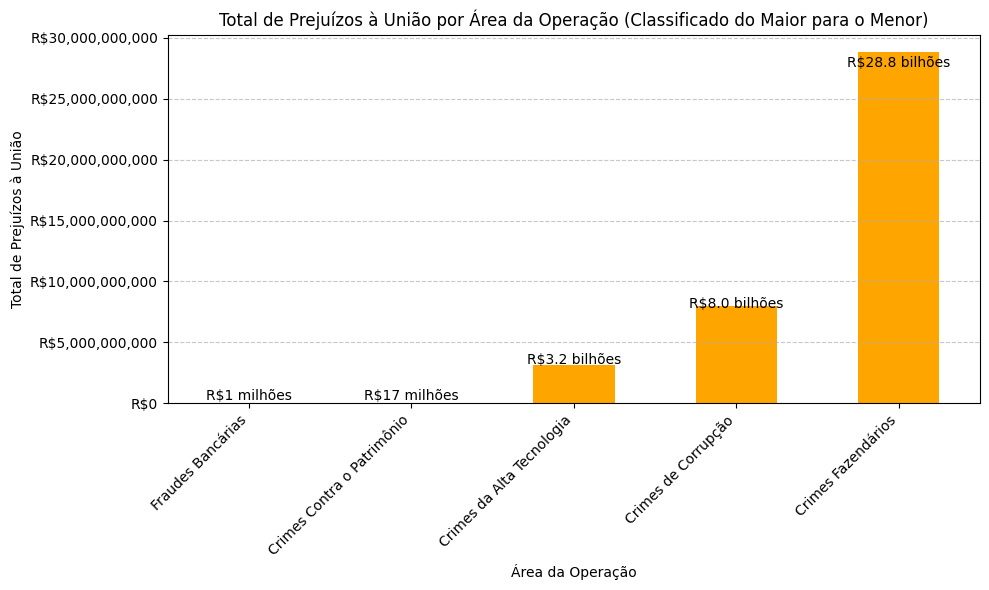

In [124]:
# Agrupar por área e calcular o total de prejuízos em cada área, classificando de forma decrescente
prejuizos_por_area = df.groupby('Area')['Qtd Prejuizos Causados a Uniao'].sum().sort_values(ascending=True)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
ax = prejuizos_por_area.plot(kind='bar', color='orange')
plt.xlabel('Área da Operação')
plt.ylabel('Total de Prejuízos à União')
plt.title('Total de Prejuízos à União por Área da Operação (Classificado do Maior para o Menor)')

# Formatar rótulos do eixo Y em formato de moeda (R$)
formatter = ticker.FuncFormatter(lambda x, pos: 'R${:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar anotações para os top 5 valores de dano causado em cada área
for i, (area, valor) in enumerate(prejuizos_por_area.items()):
    if i < 5:
        if valor >= 1e9:  # Se o valor for maior ou igual a 1 bilhão
            plt.text(i, valor * 0.95, f'R${valor/1e9:.1f} bilhões', ha='center', va='bottom')
        else:  # Se o valor for menor que 1 bilhão
            plt.text(i, valor * 1.02, f'R${valor/1e6:.0f} milhões', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 2.Qual a quantidade total de prisões em flagrante realizadas em cada unidade federativa?

In [125]:
# Agrupar por unidade federativa e calcular a soma das prisões em flagrante
prisoes_por_uf = df.groupby('Sigla Unidade Federativa')['Qtd Prisao em Flagrante'].sum()

# Ordenar os resultados pelas maiores prisões em flagrante
prisoes_por_uf_ordenadas = prisoes_por_uf.sort_values(ascending=False)

# Exibir o resultado
print(prisoes_por_uf_ordenadas)

Sigla Unidade Federativa
PR    11
RS     5
SC     3
PA     3
SE     1
DF     1
BA     0
RJ     0
SP     0
RO     0
PI     0
PB     0
MS     0
MG     0
GO     0
ES     0
TO     0
Name: Qtd Prisao em Flagrante, dtype: int64


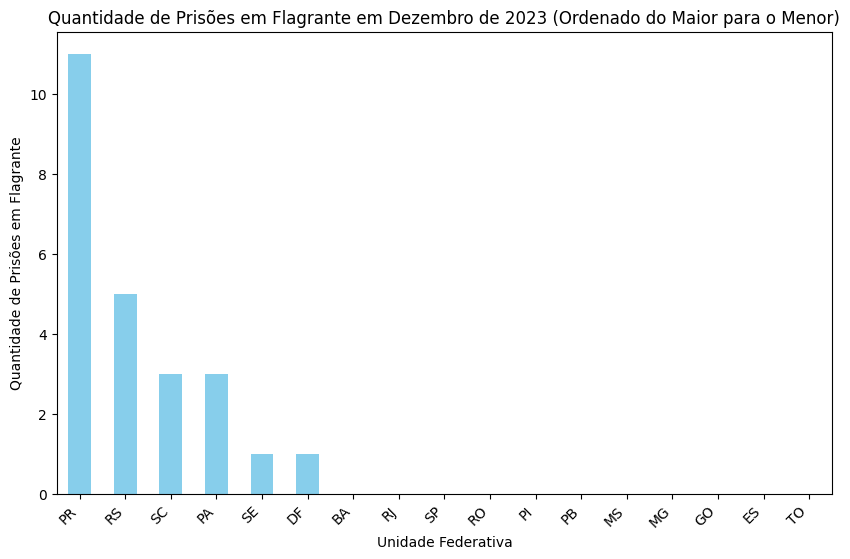

In [126]:

# Calcular a quantidade total de prisões em flagrante em cada unidade federativa
prisoes_por_uf = df.groupby('Sigla Unidade Federativa')['Qtd Prisao em Flagrante'].sum()

# Ordenar os dados pela quantidade de prisões em flagrante, do maior para o menor
prisoes_por_uf_ordenadas = prisoes_por_uf.sort_values(ascending=False)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
prisoes_por_uf_ordenadas.plot(kind='bar', color='skyblue')
plt.xlabel('Unidade Federativa')
plt.ylabel('Quantidade de Prisões em Flagrante')
plt.title('Quantidade de Prisões em Flagrante em Dezembro de 2023 (Ordenado do Maior para o Menor)')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3.Quantas operações de busca e apreensão foram realizadas em cada unidade federativa?

In [127]:
# Ordenar os resultados pela contagem das operações de busca e apreensão
operacoes_busca_por_uf_ordenadas = operacoes_busca_por_uf.sort_values(ascending=False)

# Exibir o resultado
print(operacoes_busca_por_uf_ordenadas)

Sigla Unidade Federativa
PI    43
RS    37
SE    14
SP    10
DF     9
TO     5
RJ     3
BA     2
ES     2
Name: Qtd Mandado de Busca e Apreesao, dtype: int64


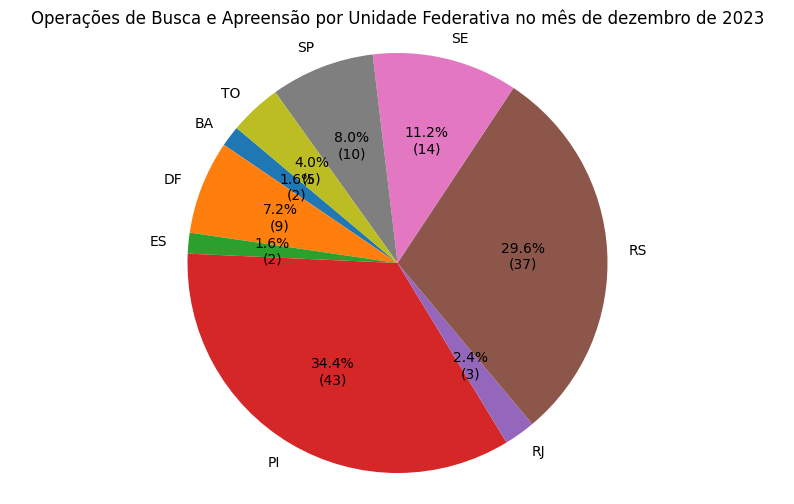

In [128]:
# Filtrar as unidades federativas com quantidade diferente de zero
operacoes_busca_por_uf = df.groupby('Sigla Unidade Federativa')['Qtd Mandado de Busca e Apreesao'].sum()
operacoes_busca_por_uf = operacoes_busca_por_uf[operacoes_busca_por_uf != 0]

# Configurar o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(operacoes_busca_por_uf, labels=operacoes_busca_por_uf.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(operacoes_busca_por_uf) / 100),
        startangle=140)

# Adicionar título
plt.title('Operações de Busca e Apreensão por Unidade Federativa no mês de dezembro de 2023')

# Mostrar o gráfico
plt.axis('equal')
plt.show()


## 4.Qual é o estado com o maior valor total de prejuízos causados à União em operações relacionadas a crimes fazendários?

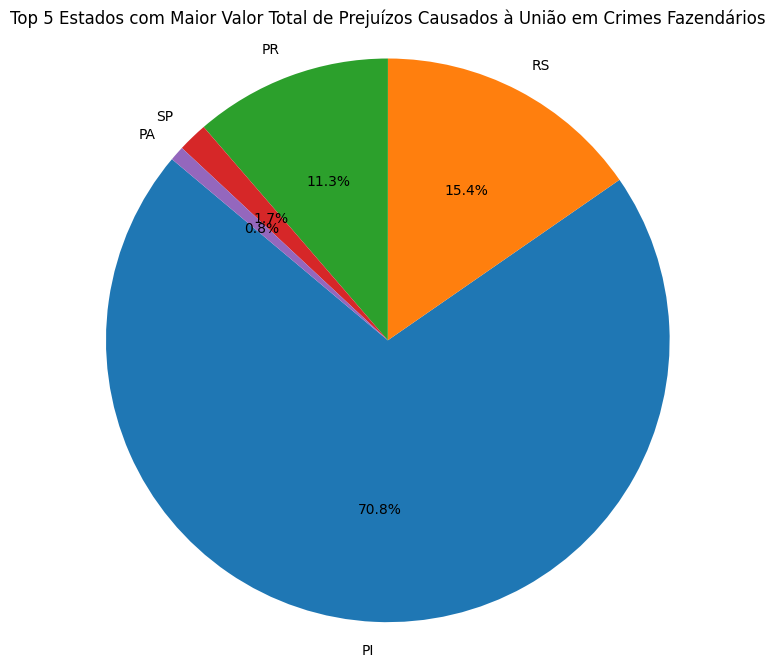

In [140]:
# Agrupar por estado e calcular o valor total de prejuízos causados à União em cada estado
prejuizos_por_estado = crimes_fazendarios.groupby('Sigla Unidade Federativa')['Qtd Prejuizos Causados a Uniao'].sum()

# Selecionar os top 5 estados com maior valor total de prejuízos causados à União
top_5_estados = prejuizos_por_estado.nlargest(5)

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_5_estados, labels=top_5_estados.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Estados com Maior Valor Total de Prejuízos Causados à União em Crimes Fazendários')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
